# Problem 2: The AS-AD Model

Consider the following **AS-AD model**. The **goods market equilibrium** is given by

$$ y_{t} = -\alpha r_{t} + v_{t} $$

where $y_{t}$ is the **output gap**, $r_{t}$ is the **ex ante real interest** and $v_{t}$ is a **demand disturbance**. 

The central bank's **Taylor rule** is

$$ i_{t} = \pi_{t+1}^{e} + h \pi_{t} + b y_{t}$$

where $i_{t}$ is the **nominal interest rate**, $\pi_{t}$ is the **inflation gap**, and $\pi_{t+1}^{e}$ is the **expected inflation gap**. 

The **exante real interest rate** is given by 

$$ r_{t} = i_{t} - \pi_{t+1}^{e} $$

Together, the above implies that the **AD-curve** is

$$ \pi_{t} = \frac{1}{h\alpha}\left[v_{t} - (1+b\alpha)y_{t}\right]$$

Further, assume that the **short-run supply curve (SRAS)** is given by

$$ \pi_{t} = \pi_{t}^{e} + \gamma y_{t} + s_{t}$$

where $s_t$ is a **supply disturbance**.

**Inflation expectations are adaptive** and given by

$$ \pi_{t}^{e} = \phi\pi_{t-1}^{e} + (1-\phi)\pi_{t-1}$$

Together, this implies that the **SRAS-curve** can also be written as

$$ \pi_{t} = \pi_{t-1} + \gamma y_{t} - \phi\gamma y_{t-1} + s_{t} - \phi s_{t-1} $$

The **parameters** of the model are:

In [7]:
par = {}

par['alpha'] = 5.76
par['h'] = 0.5
par['b'] = 0.5
par['phi'] = 0
par['gamma'] = 0.075
par['delta'] = 0.80
par['omega'] = 0.15
par['sigma_x'] = 3.492
par['sigma_c'] = 0.2

In [2]:
import numpy as np
from scipy import linalg
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
import ipywidgets as widgets

## Question 1
Use the ``sympy`` module to solve for the equilibrium values of output, $y_t$, and inflation, $\pi_t$, (where AD = SRAS) given the parameters ($\alpha$, $h$, $b$, $\alpha$, $\gamma$) and $y_{t-1}$ , $\pi_{t-1}$, $v_t$, $s_t$, and $s_{t-1}$.

In [3]:
# Defining the AD and the SRAS functions

# i. Defining symbols
sm.init_printing(use_unicode=True)
pit = sm.symbols('pi_t')
pit1 = sm.symbols('pi_t-1')
alpha = sm.symbols('alpha')
gamma = sm.symbols('gamma')
phi = sm.symbols('phi')
h = sm.symbols('h')
b = sm.symbols('b')
vt = sm.symbols('v_t')
yt = sm.symbols('y_t')
yt1 = sm.symbols('y_t-1')
st = sm.symbols('s_t')
st1 = sm.symbols('s_t-1')


# ii. AD-curve 
AD = sm.Eq(1/(h*alpha)*(vt-(1+b*alpha)*yt), pit)

# iii. SRAS-curve 
SRAS = sm.Eq(pit1 + gamma*yt - phi*gamma*yt1 + st - phi*st1, pit)



The equilibrium value of y is:


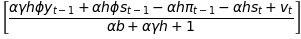

In [4]:
# Solving for y

# i. Setting AD equal to SRAS 
AD_SRAS = sm.Eq(1/(h*alpha)*(vt-(1+b*alpha)*yt), pit1 + gamma*yt - phi*gamma*yt1 + st - phi*st1)

# ii. Solving for y 
yt_star = sm.solve(AD_SRAS, yt)

# iii. Printing y*
print(f'The equilibrium value of y is:')
yt_star

The equilibrium value of pi is:


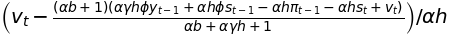

In [5]:
# Solving for pi 

# i. Inserting y* in the AD function
pit_star = 1/(h*alpha)*(vt-(1+b*alpha)*yt_star[0])

# ii. Printing pi*
print(f'The equilibrium value of pi is:')
pit_star

## Question 2
Find and illustrate the equilibrium when $y_{t-1} = \pi_{t-1} = v_t = s_t = s_{t-1} = 0$. Illustrate how the equilibrium changes when instead $v_t = 0.1$.

In [6]:
# Defining variable values 
yt1_int = 0 
pit1_int = 0 
vt_int = 0 
st_int = 0 
st1_int = 0 

vt_one = 0.1


## Solving numerically for y 

# a. Defining a lambda function of yt_eq 
_sol_y_func = sm.lambdify((h,b,alpha,gamma,phi,vt,st,pit1,yt1,st1),yt_star[0])

# b. Defining a function which solve for y, given values and parameters 
def sol_y_func(vt,st,pit1,yt1,st1,h=par['h'],alpha=par['alpha'],b=par['b'],gamma=par['gamma'],phi=par['phi']):
    return _sol_y_func(h,b,alpha,gamma,phi,vt,st,pit1,yt1,st1)

# c. Solving for y and printing the solution 
y_star = sol_y_func(vt=vt_int,st=st_int,pit1=pit1_int,yt1=yt1_int,st1=st1_int)
print(f'The equilibrium value of y, given variable values and parameters is: {y_star}')



##  Solving for pi 

# a. Defining a lambda function of yt_eq 
_sol_pi_func = sm.lambdify((h,b,alpha,gamma,phi,yt,vt,st,pit1,yt1,st1),pit_star)

# b. Defining a function which solve for pi, given values and parameters
def sol_pi_func(vt,st,yt,pit1,yt1,st1,h=par['h'],alpha=par['alpha'],b=par['b'],gamma=par['gamma'],phi=par['phi']):
    return _sol_pi_func(h,b,alpha,gamma,phi,yt,vt,st,pit1,yt1,st1)

# c. Solving for pi, using the value of y_star, and printing the solution 
pi_star = sol_pi_func(vt=vt_int,st=st_int,yt=y_star,pit1=pit1_int,yt1=yt1_int,st1=st1_int)
print(f'The equilibrium value of pi, given variable values and parameters is: {pi_star}')



The equilibrium value of y, given variable values and parameters is: 0.0
The equilibrium value of pi, given variable values and parameters is: 0.0


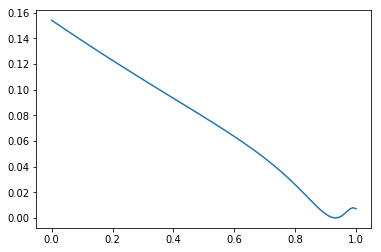

In [352]:
def find_y_pi(phi,sigma_x,sigma_c):
    num = 1000
    # Generate shock-process
    np.random.seed(seed)

    v = v_series(num,par,sigma_x)
    s = s_series(num,par,sigma_c)
    
    #v[0] = 0
    #s[0] = 0
    
    #v = np.random.normal(0,sigma_c,num)
    #s = np.random.normal(0,sigma_c,num)
    
    # Generate y and pi process
    y = np.zeros(num)
    pi = np.zeros(num)
    for i in range(1,num):
        #y[i] = (par['alpha']*par['gamma']*par['h']*phi*y[i-1]+par['alpha']*par['h']*phi*s[i-1]-par['alpha']*par['h']*pi[i-1]-par['alpha']*par['h']*s[i]+v[i])/(par['alpha']*par['b']+par['alpha']*par['gamma']*par['h']+1)
        #pi[i] = (v[i]-((par['alpha']*par['b']+1)*y[i]))/(par['alpha']*par['h'])
        y[i] = sol_y_func(v[i],s[i],pi[i-1],y[i-1],s[i-1],phi=phi)
        pi[i] = sol_pi_func(v[i],s[i],y[i],pi[i-1],y[i-1],s[i-1],phi=phi)
        
    # Calculate statistics
    y_var = (np.var(y)-1.64)**2
    pi_var = (np.var(pi)-0.21)**2
    ypi_corr = (np.corrcoef(y,pi)[0,1]-0.31)**2
    y_autocorr = (np.corrcoef(y[:-1],y[1:])[0,1]-0.84)**2
    pi_autocorr = (np.corrcoef(pi[:-1],pi[1:])[0,1]-0.48)**2
    
    stats = [y_var,pi_var,ypi_corr,y_autocorr,pi_autocorr]
    
    return stats

def obj_fun(inputs):
    x,y,z = inputs
    stats = find_y_pi(x,y,z)
    sq_sum_stats = sum(stats)
    return sq_sum_stats

x0 = [par['phi'],par['sigma_x'],par['sigma_c']]
bnds = [(0,1),(0,np.inf),(0,np.inf)]

"""result = optimize.minimize(obj_fun,x0,bounds=bnds,method='SLSQP')
result
"""
#find_y_pi(0.9606,3.1916,0.2183)

x = np.linspace(0,1,100)
y = np.empty(100)

for j,i in enumerate(x):
    y[j] = find_y_pi(i,par['sigma_x'],par['sigma_c'])[2]
    
plt.plot(x,y)
#result

In [346]:
seed = 11
np.random.seed(seed)

num = 1000

def x_shock(num,par,sigma_x):
    x = np.random.normal(0,sigma_x,num)
    return x
    
def c_shock(num,par,sigma_c):
    c = np.random.normal(0,sigma_c,num)
    return c

def v_series(num,par,sigma_x):
    v = np.zeros(num)
    x = x_shock(num,par,sigma_x)
    for i in range(1,num):
        v[i] = par['delta']*v[i-1]+x[i]
    return v

def s_series(num,par,sigma_c):
    s = np.zeros(num)
    c = c_shock(num,par,sigma_c)
    for i in range(1,num):
        s[i] = par['omega']*s[i-1]+c[i]
    return s

def var_set(num,par,phi_val,sigma_x,sigma_c):
    np.random.seed(seed)
    
    v = v_series(num,par,sigma_x)
    s = s_series(num,par,sigma_c)
    
    y = np.zeros(num)
    pi = np.zeros(num)
    
    for i in range(1,num):
        y[i] = sol_y_func(v[i],s[i],pi[i-1],y[i-1],s[i-1],phi=phi_val)
        pi[i] = sol_pi_func(v[i],s[i],y[i],pi[i-1],y[i-1],s[i-1],phi=phi_val)
    
    y_var = np.var(y)
    pi_var = np.var(pi)
    ypi_corr = np.corrcoef(y,pi)[0,1]
    y_autocorr = np.corrcoef(y[:-1],y[1:])[0,1]
    pi_autocorr = np.corrcoef(pi[:-1],pi[1:])[0,1]
    
    return y_var, pi_var, ypi_corr, y_autocorr, pi_autocorr

def min_dist(phi,sigma_x,sigma_c,*args):
    y_var_g = 1.64
    pi_var_g = 0.21
    ypi_corr_g = 0.31
    y_autocorr_g = 0.84
    pi_autocorr_g = 0.48
    
    #print(*args)
    var_set_vals = var_set(args[0],args[1],phi,sigma_x,sigma_c)
    
    y_var_sq = abs(var_set_vals[0]-y_var_g)
    pi_var_sq = abs(var_set_vals[1]-pi_var_g)
    ypi_corr_sq = abs(var_set_vals[2]-ypi_corr_g)
    y_autocorr_sq = abs(var_set_vals[3]-y_autocorr_g)
    pi_autocorr_sq = abs(var_set_vals[4]-pi_autocorr_g)
    
    return np.sum(np.array([y_var_sq,pi_var_sq,ypi_corr_sq,y_autocorr_sq,pi_autocorr_sq]))

def min_corr(num,par,phi):
    return (var_set(num,par,phi,par['sigma_x'],par['sigma_c'])[2]-0.31)**2

def obj_fun(inputs,*args):
    x,y,z = inputs
    return min_dist(x,y,z,*args)

x0 = [par['phi'],par['sigma_x'],par['sigma_c']]

bnds = [(0,1),(0,np.inf),(0,np.inf)]

result = optimize.minimize(obj_fun,x0,args=(num,par),method='SLSQP',bounds=bnds)
result

result.x

#var_set(num,par,phi_res,x_res,c_res)
#print(curr_opt, opt_par) 


# Result w/ original parameters
#var_set(num,par,result.x[0],result.x[1],result.x[2])

array([1.        , 3.10633836, 0.21246156])

In [190]:
def collect(x):
    
    global fun
    global phi_vals
    global sigma_x_vals
    global evals
    
    if evals == 0:
        fun = []
        fun.append(obj_fun(x0))
        phi_vals = []
        phi_vals.append(x0[0])
        sigma_x_vals = []
        sigma_x_vals.append(x0[1])
        
    if evals != 0:
        fun.append(obj_fun(x))
        phi_vals.append(x[0])
        sigma_x_vals.append(x[1])
    
    evals += 1

np.random.seed(seed)


s = s_series(num,par,par['sigma_c'])
    
def test_5(num,par,phi_val,sigma_x,s):
    
    v = v_series(num,par,sigma_x)
    
    y = np.zeros(num)
    pi = np.zeros(num)
    
    for i in range(1,num):
        y[i] = sol_y_func(v[i],s[i],pi[i-1],y[i-1],s[i-1],phi=phi_val)
        pi[i] = sol_pi_func(v[i],s[i],y[i],pi[i-1],y[i-1],s[i-1],phi=phi_val)
        
    v1 = np.corrcoef(y,pi)[0,1]
    #v2 = np.corrcoef(y[:-1],y[1:])[0,1]
    
    return v1

def obj_fun(x):
    phi= x[0]
    sigma_x = x[1]
    vals = test_5(num,par,phi,sigma_x,s)
    v1 = (vals-0.31)**2
    #v2 = (vals[1]-0.84)**2
    v2 = 0
    
    return np.sum(np.array([v1]))

x0 = [.1,.1]
evals = 0

result = optimize.minimize(obj_fun,x0,method='Nelder-Mead',options={'maxiter':3000})